# resultante base de datos y csv

### Importaciones necesarias para el proyecto 📚

- `os`: Se utiliza para interactuar con el sistema operativo, como manejar rutas de archivos y directorios 🗂️.
- `pandas as pd`: Esencial para la manipulación y análisis de datos, utilizado ampliamente para la estructuración de datos en forma de tablas 📊.
- `psycopg2`: Librería para conectar Python con bases de datos PostgreSQL, permitiendo ejecutar comandos SQL y gestionar la base de datos desde Python 🛢️.
- `matplotlib.pyplot as plt`: Usado para crear visualizaciones de datos estáticas, animadas e interactivas en Python 📉.
- `from ETL_Workshop_02.NOTEBOOKS.config_merge import ...`: Importa configuraciones específicas como rutas y credenciales de acceso a bases de datos desde un módulo de configuración personalizado, lo cual ayuda a organizar mejor el código y mejora la seguridad 🔐.


In [12]:
import os
import pandas as pd
import psycopg2
import psycopg2.extras
import pandas as pd
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from ETL_Workshop_02.NOTEBOOKS.config_merge import RUTA_DESTINO_spotify, file_path, host, dbname, user, password, port


ModuleNotFoundError: No module named 'ETL_Workshop_02'

## Carga y Preparación de Datos 📂

### Conexión a Base de Datos
🔗 Se establece una conexión con una base de datos PostgreSQL para acceder a los datos almacenados. Se utiliza `psycopg2` para manejar la conexión y las operaciones de la base de datos.

### Lectura de Datos de Spotify
🎵 Se lee un archivo CSV que contiene datos de Spotify usando `pandas`. Se especifican las columnas de interés y los tipos de datos adecuados para asegurar que la manipulación de los datos sea correcta.

### Consulta a Datos de Grammy
🏆 Se realiza una consulta SQL para extraer datos de los premios Grammy de la base de datos. Los resultados se almacenan en un `DataFrame` de `pandas`.

### Normalización y Fusión de Datos
🔄 Se normalizan los nombres de los nominados y los títulos de las canciones para permitir una comparación precisa. Luego, se realiza una fusión de los datos de Spotify y Grammy basada en estos campos normalizados para integrar ambos conjuntos de datos.

### Limpieza y Reorganización de Datos
🧹 Se eliminan columnas temporales usadas para la fusión y se reorganizan las columnas finales para mejorar la claridad del `DataFrame` resultante.

### Cierre de Conexión
🔒 Finalmente, se cierra el cursor y la conexión a la base de datos para liberar recursos.

### Guardado de Datos
💾 Los datos finales se guardan en un archivo CSV para su uso posterior o análisis.


In [11]:
def load_and_prepare_data(spotify_path):
    conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)
    cursor = conn.cursor()

    try:
        spotify_cols = ['track_id', 'track_name', 'artists', 'popularity', 'danceability', 'energy', 'tempo']
        dtype_spotify = {'track_id': str, 'popularity': int, 'danceability': float, 'energy': float, 'tempo': float}
        spotify_data = pd.read_csv(spotify_path, usecols=spotify_cols, dtype=dtype_spotify)
        print(f"Number of rows in Spotify data: {spotify_data.shape[0]}")
        cursor.execute("""
            SELECT year, category, nominee, artist, winner
            FROM grammy_data;
        """)
        grammy_data = pd.DataFrame(cursor.fetchall(), columns=['year', 'category', 'nominee', 'artist', 'winner'])
        print(f"Number of rows in Grammy data: {grammy_data.shape[0]}")
        grammy_data['nominee_normalized'] = grammy_data['nominee'].str.lower().str.strip()
        spotify_data['track_name_normalized'] = spotify_data['track_name'].str.lower().str.strip()
        merged_data = pd.merge(grammy_data, spotify_data, left_on='nominee_normalized', right_on='track_name_normalized', how='inner')
        print(f"Number of rows in merged data: {merged_data.shape[0]}")
        merged_data.drop(columns=['nominee_normalized', 'track_name_normalized'], inplace=True)
        merged_data = merged_data[['year', 'category', 'nominee', 'artist', 'winner', 'track_id', 'popularity', 'danceability', 'energy', 'tempo']]
        merged_data.columns = ['Year', 'Category', 'Nominee', 'Artist', 'Winner', 'Track_ID', 'Popularity', 'Danceability', 'Energy', 'Tempo']

        return merged_data

    finally:
        cursor.close()
        conn.close()

spotify_path = os.path.join(RUTA_DESTINO_spotify)
final_data = load_and_prepare_data(spotify_path)
final_data.to_csv(os.path.join(file_path), index=False)

NameError: name 'host' is not defined

📁 **Unión de la Ruta del Archivo**:
- `os.path.join(file_path)` se utiliza para asegurar que la ruta del archivo sea correcta, independientemente del sistema operativo. Esto evita problemas de compatibilidad al unir componentes de una ruta de archivo.

📊 **Carga de Datos**:
- `pd.read_csv(file_path)` carga los datos desde el archivo CSV especificado en la ruta `file_path`. Pandas se utiliza aquí debido a su eficiencia y facilidad de uso en la manipulación de datos tabulares.

👀 **Visualización de Datos**:
- `print(data.head(30))` muestra las primeras 30 filas del DataFrame `data`. Esto es útil para obtener una vista preliminar de los datos, verificar que se hayan cargado correctamente y observar el formato de las columnas.


In [ ]:
file_path = os.path.join(file_path)
data = pd.read_csv(file_path)
print(data.head(30))

    Year            Category  Nominee         Artist  Winner  \
0   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
1   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
2   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
3   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
4   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
5   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
6   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
7   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
8   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
9   2019  Record Of The Year  Bad Guy  Billie Eilish    True   
10  2019  Record Of The Year  Bad Guy  Billie Eilish    True   
11  2019  Record Of The Year  Bad Guy  Billie Eilish    True   
12  2019  Record Of The Year  Bad Guy  Billie Eilish    True   
13  2019  Record Of The Year  Bad Guy  Billie Eilish    True   
14  2019  Record Of The Year  Bad Guy  B

### Carga de Datos y Análisis Preliminar 📊

1. **Unión de la Ruta del Archivo:**
   - Utilizamos `os.path.join` para asegurar que la ruta del archivo es correcta independientemente del sistema operativo que estemos usando. Esto garantiza compatibilidad y evita errores en el acceso al archivo.

2. **Carga de Datos:**
   - `pd.read_csv(file_path)` se encarga de cargar los datos desde el archivo especificado en la ruta `file_path`. Utilizamos Pandas, que es una biblioteca muy potente para el manejo y análisis de datos en formato tabular.

3. **Conteo de Filas:**
   - `len(data)` nos permite obtener el total de filas del dataframe. Esto es útil para tener una idea del tamaño del dataset con el que estamos trabajando.

4. **Detección de Filas Duplicadas:**
   - `data.duplicated().sum()` calcula el número de filas duplicadas en el dataset. Es importante identificar y manejar duplicados ya que pueden afectar el análisis de los datos.

5. **Visualización de Datos:**
   - `print(data.head(30))` muestra las primeras 30 filas del dataframe. Esto es muy útil para obtener una vista rápida de la estructura y los tipos de datos que contiene el dataset, facilitando una inspección inicial visual.


In [ ]:
file_path = os.path.join(file_path)
data = pd.read_csv(file_path)
total_rows = len(data)
print("Total de filas en el archivo:", total_rows)
duplicate_rows = data.duplicated().sum()
print("Cantidad de filas duplicadas:", duplicate_rows)

Total de filas en el archivo: 3677
Cantidad de filas duplicadas: 963


🔗 **Unión de la ruta de archivo**: Utilizamos `os.path.join` para asegurar que la ruta del archivo sea correcta independientemente del sistema operativo.

📂 **Carga de datos**: Se carga un archivo CSV en un DataFrame de pandas con `pd.read_csv`, lo que nos permite manipular los datos fácilmente.

🔢 **Conteo inicial de filas**: Se calcula la cantidad total de filas antes de realizar operaciones usando `len(data)`, para tener un registro inicial del tamaño de los datos.

🕵️‍♂️ **Detección de duplicados**: Usamos `data.duplicated().sum()` para encontrar y contar todas las filas duplicadas en el DataFrame.

🚮 **Eliminación de duplicados**: Las filas duplicadas se eliminan con `data.drop_duplicates()`, lo que ayuda a limpiar los datos para análisis posteriores.

💾 **Guardado de datos**: El DataFrame limpio se guarda de nuevo en formato CSV con `data.to_csv`, usando `index=False` para no incluir el índice del DataFrame en el archivo.

🔢 **Conteo final de filas**: Finalmente, se muestra el total de filas después de la limpieza, permitiendo verificar cuántas filas fueron eliminadas.


In [ ]:
file_path = os.path.join(file_path)
data = pd.read_csv(file_path)
total_rows_before = len(data)
print("Total de filas en el archivo antes de eliminar duplicados:", total_rows_before)
duplicate_rows = data.duplicated().sum()
print("Cantidad de filas duplicadas:", duplicate_rows)
data = data.drop_duplicates()
data.to_csv(file_path, index=False)
total_rows_after = len(data)
print("Total de filas en el archivo después de eliminar duplicados:", total_rows_after)

Total de filas en el archivo antes de eliminar duplicados: 3677
Cantidad de filas duplicadas: 963
Total de filas en el archivo después de eliminar duplicados: 2714


### 🗂️ Configuración del Path de Datos
Establecemos la ruta de acceso a los datos utilizando la función `os.path.join`, lo que garantiza que el path sea correcto sin importar el sistema operativo que se use.

### 🎨 Configuración de Estilo de Gráficos
- Utilizamos un fondo oscuro para nuestros gráficos con `plt.style.use('dark_background')`.
- Definimos colores personalizados para los componentes del gráfico, como el color de texto y bordes, usando los colores temáticos de Spotify: verde, negro y blanco.

### 📊 Gráfico de Boxplot: Popularidad de Canciones por Año
- Creamos un boxplot para visualizar la distribución de la popularidad de las canciones por año.
- Ajustamos las propiedades visuales del gráfico, como el color de las medianas y los bordes de las cajas usando los colores de Spotify.
- Personalizamos la rotación de las etiquetas del eje x y ajustamos el layout para que todo se muestre correctamente.

### 📈 Gráfico de Dispersión: Relación entre Danceability y Energy
- Representamos la relación entre 'Danceability' y 'Energy' de las canciones, diferenciando entre ganadores y no ganadores.
- Usamos colores y marcadores personalizados para distinguir visualmente entre los dos grupos.

### 🏆 Top 10 Artistas con Más Nominaciones
- Creamos un gráfico de barras para mostrar los 10 artistas con más nominaciones.
- Usamos el color verde de Spotify para las barras, lo que mantiene la coherencia visual del tema.

### 🥧 Gráfico de Pie: Proporción de Ganadores y No Ganadores
- Visualizamos la proporción de ganadores y no ganadores mediante un gráfico circular.
- Personalizamos los colores del gráfico utilizando los colores temáticos de Spotify y ajustamos el ángulo de inicio para mejorar la visualización.


<Figure size 1200x600 with 0 Axes>

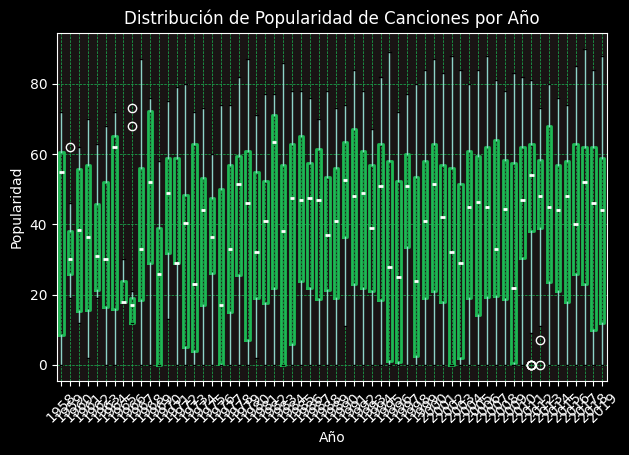

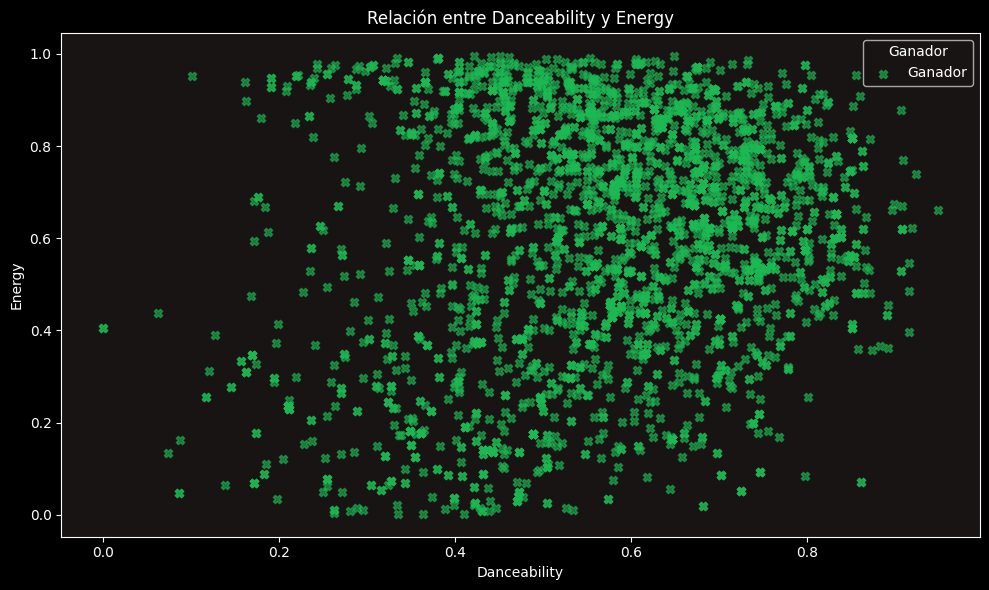

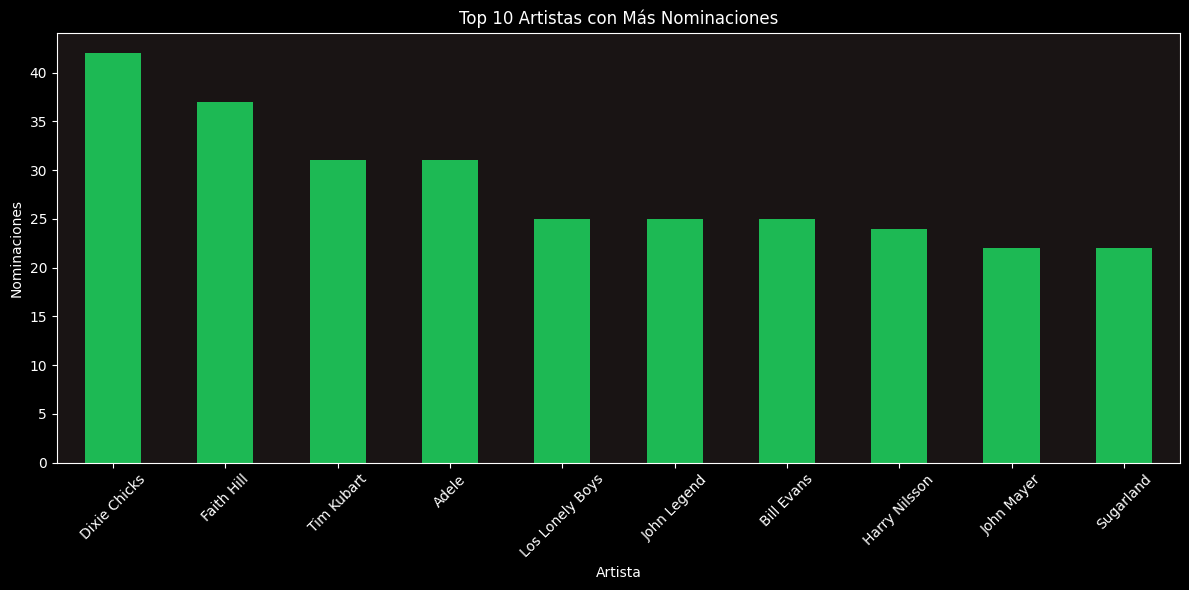

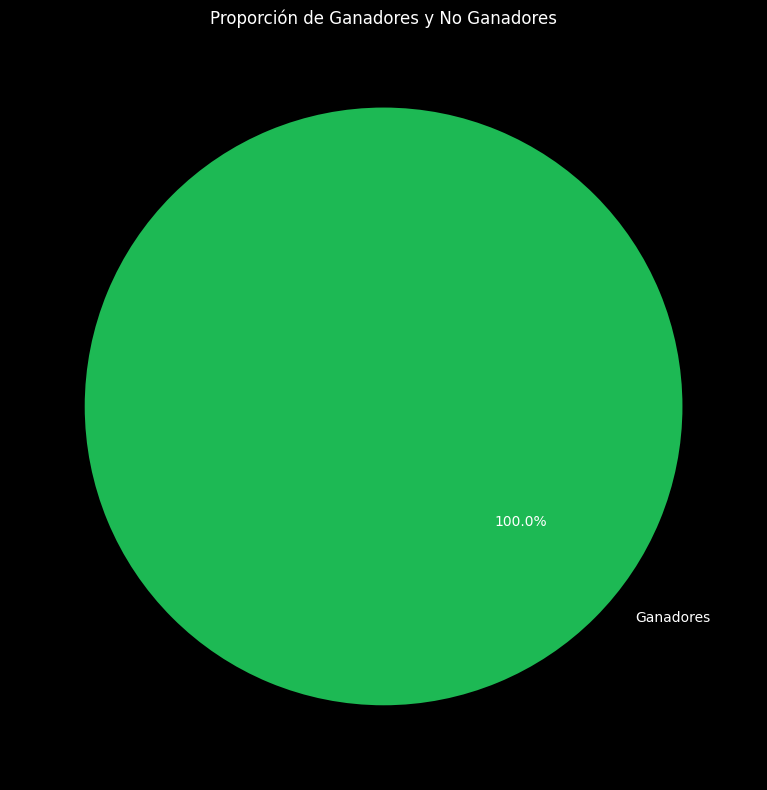

In [ ]:
data = os.path.join(file_path)

spotify_green = '#1DB954'
spotify_black = '#191414'
spotify_white = '#FFFFFF'


plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = spotify_black
plt.rcParams['axes.edgecolor'] = spotify_white
plt.rcParams['text.color'] = spotify_white
plt.rcParams['xtick.color'] = spotify_white
plt.rcParams['ytick.color'] = spotify_white
plt.rcParams['axes.labelcolor'] = spotify_white


plt.figure(figsize=(12, 6))
boxprops = dict(linestyle='-', linewidth=2, color=spotify_green)
medianprops = dict(linestyle='-', linewidth=2, color=spotify_white)
data.boxplot(column='Popularity', by='Year', boxprops=boxprops, medianprops=medianprops)
plt.title('Distribución de Popularidad de Canciones por Año')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(color=spotify_green, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
colors = {True: spotify_green, False: spotify_white}
marker_styles = {True: 'X', False: 'o'}
for winner_status in data['Winner'].unique():
    subset = data[data['Winner'] == winner_status]
    plt.scatter(subset['Danceability'], subset['Energy'], c=[colors[winner_status]], label=f"{'Ganador' if winner_status else 'No Ganador'}", marker=marker_styles[winner_status], alpha=0.6)
plt.title('Relación entre Danceability y Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Ganador')
plt.tight_layout()
plt.show()


artist_counts = data['Artist'].value_counts().head(10)  # Top 10 artistas con más nominaciones
plt.figure(figsize=(12, 6))
artist_counts.plot(kind='bar', color=spotify_green)
plt.title('Top 10 Artistas con Más Nominaciones')
plt.xlabel('Artista')
plt.ylabel('Nominaciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


winner_counts = data['Winner'].value_counts()
plt.figure(figsize=(8, 8))
winner_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=[spotify_green, spotify_white], labels=['Ganadores', 'No Ganadores'])
plt.title('Proporción de Ganadores y No Ganadores')
plt.ylabel('')
plt.tight_layout()
plt.show()
